Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)
Using Nadam for optimization

[
    Conv2D(filters=32, kernel_size=2, strides=2, padding='same', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.15)),
    ELU(),
    MaxPool2D(pool_size=3),
    Conv2D(filters=48, kernel_size=3, strides=2, padding='same', kernel_regularizer=l2(0.15)),
    ELU(),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(750),
    ELU(),
    Dense(1000),
    ELU(),
    Dropout(0.2),
    Dense(30),
]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        160       
_________________________________________________________________
elu_1 (ELU)                  (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooli

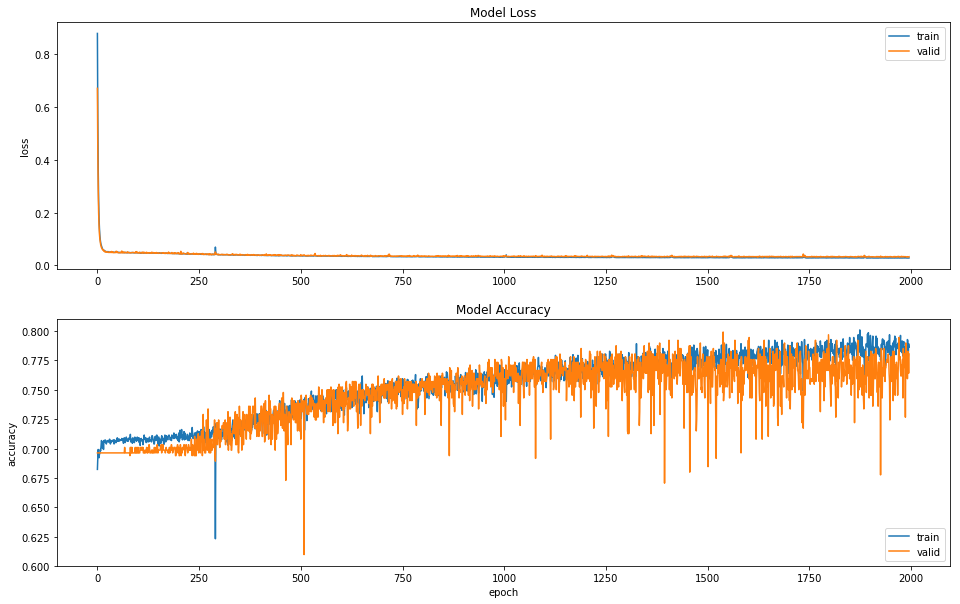

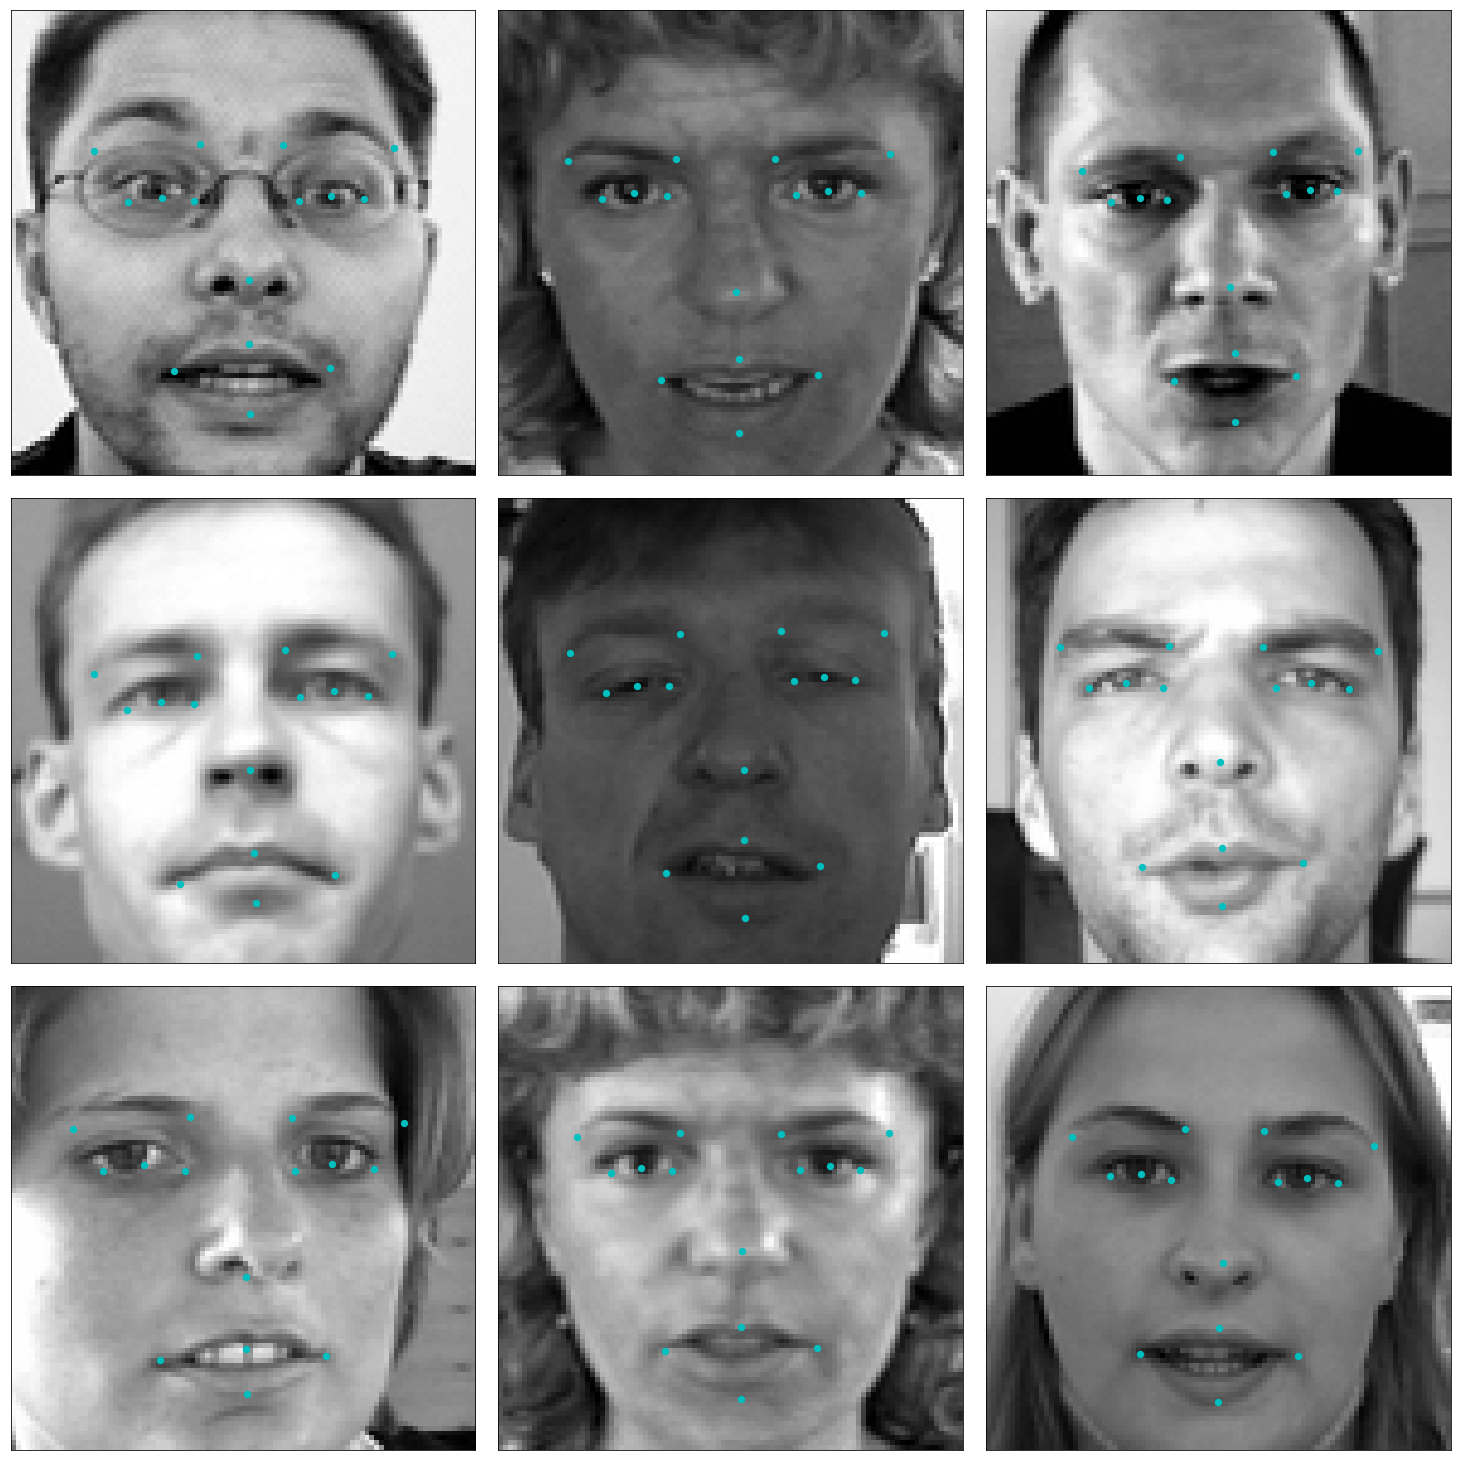

In [1]:
from utils import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Reshape, Flatten, Dense, Activation, BatchNormalization
from keras.layers.advanced_activations import PReLU, LeakyReLU, ELU
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.regularizers import l1, l2, l1_l2
from keras import losses
from datetime import timedelta, datetime

from sys import stdout
from os import system
from time import sleep

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))


max_epochs = 2000
batch_size = 128
validation_split = 0.2     # Num valid recs = num train recs * validation_split 
# learning_rate = 0.00005
# learning_rates = [9, 5, 1, 0.9, 0.5, 0.1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5]
# learning_rate = 0.004
# optimizer = optimizers.Adam(lr=learning_rate)


model_specs = [
# '''
# [
#     Conv2D(filters=32, kernel_size=3, strides=2, padding='same', input_shape=X_train.shape[1:]),
#     Activation('relu'),
#     Flatten(),
#     Dense(500),
#     Activation('relu'),
#     Dense(30),
# ]
# ''',
# '''
# [
#     Conv2D(filters=32, kernel_size=3, strides=2, padding='same', input_shape=X_train.shape[1:]),
#     Activation('relu'),
#     Dropout(0.2),
#     Conv2D(filters=64, kernel_size=3, strides=2, padding='same', input_shape=X_train.shape[1:]),
#     Activation('relu'),
#     Dropout(0.2),
#     Flatten(),
#     Dense(500),
#     Activation('relu'),
#     Dropout(0.4),
#     Dense(500),
#     Dense(30),
# ]
# ''',
# '''
# [
#     Conv2D(filters=32, kernel_size=3, strides=2, padding='same', input_shape=X_train.shape[1:]),
#     Activation('relu'),
#     Dropout(0.4),
#     Conv2D(filters=64, kernel_size=3, strides=2, padding='same'),
#     Activation('relu'),
#     Flatten(),
#     Dense(500),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(500),
#     Dense(30),
# ]
# ''',
# '''
# [
#     Conv2D(filters=16, kernel_size=5, strides=3, padding='same', input_shape=X_train.shape[1:]),
#     Activation('elu'),
#     MaxPool2D(pool_size=3),
#     Dropout(0.1),
#     Conv2D(filters=32, kernel_size=3, strides=2, padding='same'),
#     Activation('elu'),
#     MaxPool2D(pool_size=2),
#     Dropout(0.1),
#     Conv2D(filters=64, kernel_size=2, strides=2, padding='same'),
#     Activation('elu'),
#     Dropout(0.1),
#     Flatten(),
#     Dense(1000),
#     Activation('elu'),
#     Dropout(0.5),
#     Dense(1000),
#     Activation('elu'),
#     Dropout(0.25),
#     Dense(30),
# ]
# ''',
# '''
# [
#     Conv2D(filters=16, kernel_size=2, strides=2, padding='same', input_shape=X_train.shape[1:]),
# #    PReLU(),
#     Activation('relu'),
#     MaxPool2D(pool_size=2),
# #    Dropout(0.3),
#     Flatten(),
#     Dense(100),
# #    PReLU(),
#     Activation('relu'),
#     Dense(30),
# ]
# ''',
# '''
# [
#     Conv2D(filters=48, kernel_size=2, strides=2, padding='same', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.1)),
#     ELU(),
#     MaxPool2D(pool_size=2),
#     Conv2D(filters=64, kernel_size=4, strides=2, padding='same', kernel_regularizer=l2(0.1)),
#     ELU(),
#     MaxPool2D(pool_size=2),
#     Flatten(),
#     Dense(1000, kernel_regularizer=l2(0.1)),
#     ELU(),
#     Dense(1000),
#     ELU(),
#     Dropout(0.2),
#     Dense(30),
# ]
# ''',
'''
[
    Conv2D(filters=32, kernel_size=2, strides=2, padding='same', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.15)),
    ELU(),
    MaxPool2D(pool_size=3),
    Conv2D(filters=48, kernel_size=3, strides=2, padding='same', kernel_regularizer=l2(0.15)),
    ELU(),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(750),
    ELU(),
    Dense(1000),
    ELU(),
    Dropout(0.2),
    Dense(30),
]
''',
# '''
# [
#     Conv2D(filters=48, kernel_size=2, strides=2, padding='same', input_shape=X_train.shape[1:], activity_regularizer=l2(0.01)),
#     ELU(),
# #    Dropout(0.1),
#     MaxPool2D(pool_size=2),
#     Conv2D(filters=64, kernel_size=4, strides=2, padding='same', activity_regularizer=l2(0.01)),
#     ELU(),
#     MaxPool2D(pool_size=2),
#     Flatten(),
#     Dense(1000),
#     ELU(),
#     Dense(1000),
#     ELU(),
#     Dropout(0.2),
#     Dense(30),
# ]
# ''',
# '''
# [
#     Conv2D(filters=48, kernel_size=2, strides=2, padding='same', input_shape=X_train.shape[1:], bias_regularizer=l2(0.1)),
#     ELU(),
# #    Dropout(0.1),
#     MaxPool2D(pool_size=2),
#     Conv2D(filters=64, kernel_size=4, strides=2, padding='same', bias_regularizer=l2(0.1)),
#     ELU(),
#     MaxPool2D(pool_size=2),
#     Flatten(),
#     Dense(1000),
#     ELU(),
#     Dense(1000),
#     ELU(),
#     Dropout(0.2),
#     Dense(30),
# ]
# ''',
]
from collections import OrderedDict
# for learning_rate in learning_rates:
# optimizer = optimizers.Adam(lr=learning_rate)
# optimizer = optimizers.SGD(lr=5e-3, decay=1e-8, momentum=0.8, nesterov=False)
optimizers = OrderedDict([
#     ('RMSprop', RMSprop()), 
#     ('Adagrad', Adagrad()), 
#     ('Adadelta', Adadelta()), 
#     ('Adam', Adam()), 
#     ('Adamax', Adamax(lr=0.001, epsilon=1e-4, decay=0.005)), 
    ('Nadam', Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-04, schedule_decay=0.005)),
#    ('SGD', SGD(lr=0.01, momentum=0.9, decay=0.01, nesterov=True)),
])
# optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
# optimizer = optimizers.SGD()
#     print("Learning Rate: {}\n===========================".format(learning_rate))
for optimizer_name, optimizer in optimizers.items():
    print("Using {} for optimization".format(optimizer_name))
    for model_spec in model_specs:
        model = Sequential(eval(model_spec))

    # Summarize the model
        print(model_spec)
        model.summary()


        start_time = datetime.utcnow().timestamp()
        print("Model started at {}".format(datetime.now().strftime("%H:%M:%S")))

        ## TODO: Compile the model
    #     model.compile(loss=losses.mean_squared_error, optimizer=optimizer, metrics=['accuracy'])
        model.compile(loss=losses.mean_absolute_error, optimizer=optimizer, metrics=['accuracy'])

        # from keras.callbacks import ModelCheckpoint, TensorBoard
        from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LambdaCallback

        # checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
        #                                save_best_only=True)

    #     early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=50, verbose=1, mode='auto')
    #     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=50, verbose=1, cooldown=5, min_lr=learning_rate / 1000)
        epoch_print = LambdaCallback(on_epoch_begin=
                                     lambda epoch, logs: print("{}: {} of {}".format(datetime.now().strftime("%H:%M:%S"), epoch, max_epochs)) if not epoch % 20 else print("", end=''))
    # train the model
        history = model.fit(X_train, y_train, validation_split=validation_split, batch_size=batch_size,
                             epochs=max_epochs, callbacks = [epoch_print], verbose=0, shuffle=True)
    #                        epochs = max_epochs, callbacks = [reduce_lr], verbose = 0, shuffle = True)
    #                         epochs = max_epochs, callbacks = [early_stopping, reduce_lr], verbose = 0, shuffle = True)
                            # epochs = max_epochs, callbacks = [checkpointer], verbose = 2, shuffle = True)

        ## TODO: Save the model as model.h5
    #     model.save('my_model.h5')

        i = history.history['val_loss'].index(min(history.history['val_loss']))
        j = history.history['val_acc'].index(max(history.history['val_acc']))
        k = len(history.history['val_acc']) - 1
        print("\n\nVal accuracy (high): {}\nTrain accuracy: {}\nVal loss: {}\nTrain loss: {}\nepoch: {}".format(
            history.history['val_acc'][j], history.history['acc'][j], history.history['val_loss'][j], 
            history.history['loss'][j], j))
        print("\n\nVal accuracy (last rec): {}\nTrain accuracy: {}\nVal loss: {}\nTrain loss: {}\nepoch: {}".format(
            history.history['val_acc'][k], history.history['acc'][k], history.history['val_loss'][k], 
            history.history['loss'][k], k))
        print("\n\nVal accuracy (low val loss): {}\nTrain accuracy: {}\nVal loss: {}\nTrain loss: {}\nepoch: {}".format(
            history.history['val_acc'][i], history.history['acc'][i], history.history['val_loss'][i], 
            history.history['loss'][i], i))

        print("\n\n\nElapsed time: {}".format(str(timedelta(seconds=round(datetime.utcnow().timestamp() - start_time)))))
        print("\nEpochs trained: {}".format(max(history.epoch) + 1))
        stdout.flush()

        # Plot the loss and accuracy
        fig = plt.figure(figsize = (16,10))
        ax1 = fig.add_subplot(211)
        ax1.plot(history.history['loss'][4:])
        ax1.plot(history.history['val_loss'][4:])
        ax1.set_title('Model Loss')
        plt.ylabel('loss')
        plt.legend(['train', 'valid'], loc='upper right')

        ax2 = fig.add_subplot(212)
        ax2.plot(history.history['acc'][4:])
        ax2.plot(history.history['val_acc'][4:])
        ax2.set_title('Model Accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'valid'], loc='lower right')

        plt.show()
        y_test = model.predict(X_test)
        fig = plt.figure(figsize=(20,20))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
        for i in range(9):
            ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
            plot_data(X_test[i], y_test[i], ax)
        plt.show()
        system("play --no-show-progress --null --channels 1 synth 0.1 sine 800")

        print("\n\n==========================================================================================\n\n")
        stdout.flush()

        # model.load_weights('model.weights.best.hdf5')

In [2]:
for _ in range(5):
    system("play --no-show-progress --null --channels 1 synth 0.1 sine 800")
    sleep(0.05)

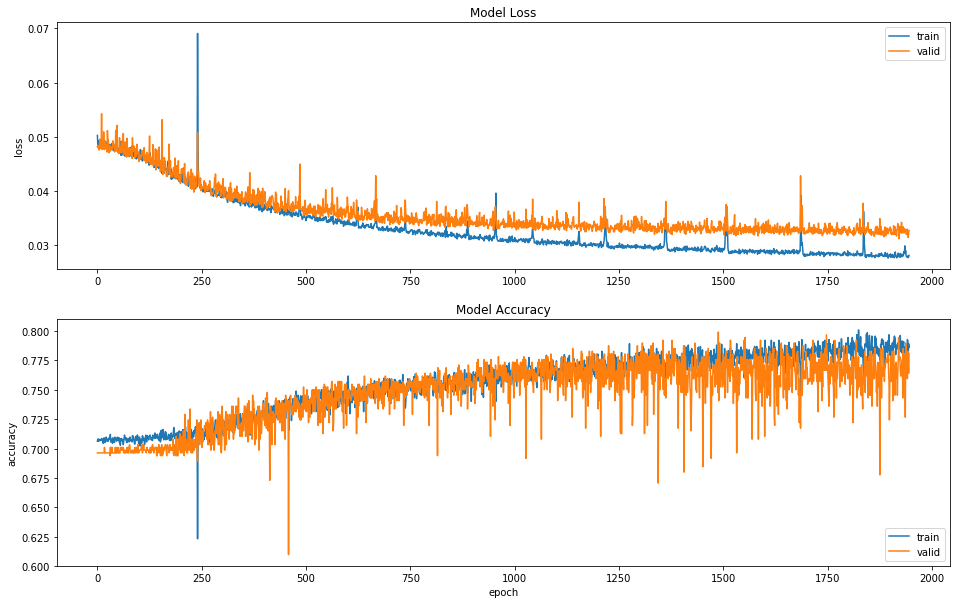

In [3]:
plot_start = 54
# Plot the loss and accuracy
fig = plt.figure(figsize = (16,10))
ax1 = fig.add_subplot(211)
ax1.plot(history.history['loss'][plot_start:])
ax1.plot(history.history['val_loss'][plot_start:])
ax1.set_title('Model Loss')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper right')

ax2 = fig.add_subplot(212)
ax2.plot(history.history['acc'][plot_start:])
ax2.plot(history.history['val_acc'][plot_start:])
ax2.set_title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')

plt.show()